# CAREER SUCCESS PROJECT #

Understanding career outcomes using data.
Many students and graduates wonder what factors influence early career success and starting salary. Understanding these relationships can help students make informed choices about their education and career paths.

Objectives:

1. To identify which academic and personal factors are most closely linked to starting salary and career success.

2. To visualize and interpret the relationships between education, skills, and career outcomes using data.

3. To build a system that can predict an individual's starting salary based on specified inputs.

Data Overview:
The data set includes information such as age, gender, GPA, university ranking, SAT scores, field of study, internships, projects, certifications, soft skills, networking score, job offers, starting salary, career satisfaction, and years to promotion.

Data Preparation Steps:

1. Explored the data to understand the types and range of values.

2. Cleaned the data by handling duplicates and correcting errors.

3. Created copies of the data for safe analysis.

4. Encoded categorical columns like gender and field of study for analysis.

### DATA PREPARATION ###

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate

In [2]:
# load data set
# read_csv() for csv & read_excel() for excel
# data file should be in the same folder as notebook
df = pd.read_excel("CareerDataSet.xlsx")

In [3]:
# view data set use df or df.head(x) or df.tail(y) 
df

,Student_ID,Age,GENDER,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,CERTIFICATITIONS,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700,9,4,Entry,6,No
4999,S05000,23,Female,2.19,1145,82,3.19,Computer Science,2,6,0,5,8,2,57000,2,5,Senior,9,No
5000,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700,9,4,Entry,6,No


In [4]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5002 non-null   object 
 1   Age                    5002 non-null   int64  
 2   GENDER                 5002 non-null   object 
 3   High_School_GPA        5002 non-null   float64
 4   SAT_Score              5002 non-null   int64  
 5   University_Ranking     5002 non-null   int64  
 6   University_GPA         5002 non-null   float64
 7   Field_of_Study         5002 non-null   object 
 8   Internships_Completed  5002 non-null   int64  
 9   Projects_Completed     5002 non-null   int64  
 10  CERTIFICATITIONS       5002 non-null   int64  
 11  Soft_Skills_Score      5002 non-null   int64  
 12  Networking_Score       5002 non-null   int64  
 13  Job_Offers             5002 non-null   int64  
 14  Starting_Salary        5002 non-null   int64  
 15  Care

In [5]:
#checking the number of rows and columns
df.shape

(5002, 20)

In [6]:
#summary statistics
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,CERTIFICATITIONS,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,23.440824,2.996939,1253.732907,504.219512,3.020152,1.982007,4.563575,2.512395,5.544982,5.537585,2.489004,50566.413435,5.579568,3.016194,5.481807
std,3.473756,0.575575,203.249731,291.067272,0.576095,1.408006,2.873048,1.703340,2.851324,2.850449,1.712014,14492.900147,2.872510,1.417299,2.883280
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.522500,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.000000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50350.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


In [7]:
# display columns
df.columns

Index(['Student_ID', 'Age', 'GENDER', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'CERTIFICATITIONS',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype='object')

In [8]:
#change column names
df = df.rename(columns = { 'GENDER' : 'Gender',
                          'CERTIFICATITIONS' : 'Certifications'
})

In [9]:
#drop unnecessary columns
df = df.drop(["Student_ID", "Entrepreneurship"], axis=1)

In [10]:
# check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4997    False
4998    False
4999    False
5000     True
5001     True
Length: 5002, dtype: bool

In [11]:
# display duplicates
df[df.duplicated()]

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance
5000,19,Male,2.7,1038,319,3.94,Law,1,4,5,5,1,5,54700,9,4,Entry,6
5001,21,Male,3.1,974,109,2.72,Arts,2,9,1,1,8,1,60800,10,4,Senior,2


In [12]:
# sum of duplicate occurences
df.duplicated().sum()

2

In [13]:
# drop duplicates
df = df.drop_duplicates()

In [14]:
# check data types
df.dtypes

Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary            int64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
dtype: object

In [15]:
#change data types
df["Current_Job_Level"] = df["Current_Job_Level"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Field_of_Study"] = df["Field_of_Study"].astype("category")

# check your data types after
df.dtypes

Age                         int64
Gender                   category
High_School_GPA           float64
SAT_Score                   int64
University_Ranking          int64
University_GPA            float64
Field_of_Study           category
Internships_Completed       int64
Projects_Completed          int64
Certifications              int64
Soft_Skills_Score           int64
Networking_Score            int64
Job_Offers                  int64
Starting_Salary             int64
Career_Satisfaction         int64
Years_to_Promotion          int64
Current_Job_Level        category
Work_Life_Balance           int64
dtype: object

In [16]:
# Count the uniques values
df["Current_Job_Level"].value_counts().to_frame()

,count
Current_Job_Level,
Entry,2463
Mid,1544
Senior,770
Executive,223


In [17]:
df["Gender"].value_counts().to_frame()

,count
Gender,
Male,2458
Female,2350
Other,192


In [18]:
df["Field_of_Study"].value_counts().to_frame()

,count
Field_of_Study,
Arts,749
Mathematics,745
Law,727
Business,719
Engineering,701
Medicine,689
Computer Science,670


In [19]:
#Check for null values
df.isnull().sum()

Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
dtype: int64

In [20]:
#print data set for the last time
df

,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7
1,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7
3,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400,7,5,Mid,5
4,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500,9,5,Mid,7
4996,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800,9,2,Entry,4
4997,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500,2,5,Mid,6
4998,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700,9,4,Entry,6


In [21]:
#create copies of cleaned data for modeling and data analysis
df_da = df.copy()
df_ml = df.copy()

### DATA ANALYSIS & VISUALISATIONS ###

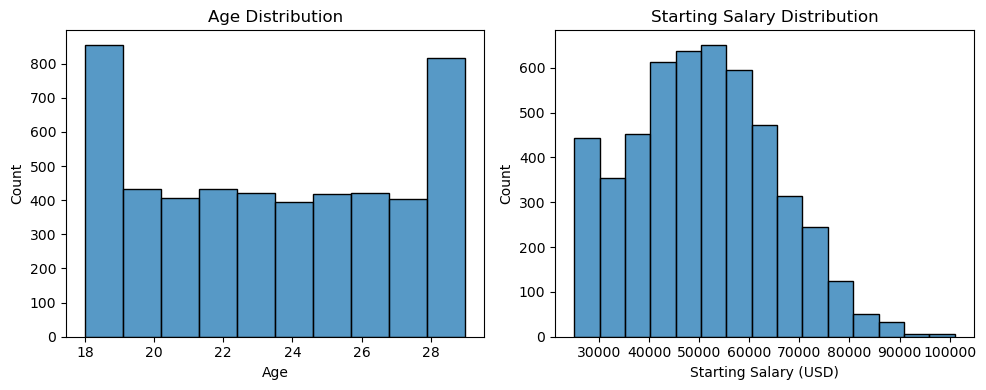

In [22]:
#Histograms

#wider, more spacious
plt.figure(figsize=(10,4))

#1. Age
plt.subplot(1, 2, 1)
sns.histplot(data=df_da, x='Age', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

#2. Starting_Salary
plt.subplot(1, 2, 2)
sns.histplot(data=df_da, x='Starting_Salary', bins=15)
plt.title('Starting Salary Distribution')
plt.xlabel('Starting Salary (USD)')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

plt.tight_layout()
plt.show()

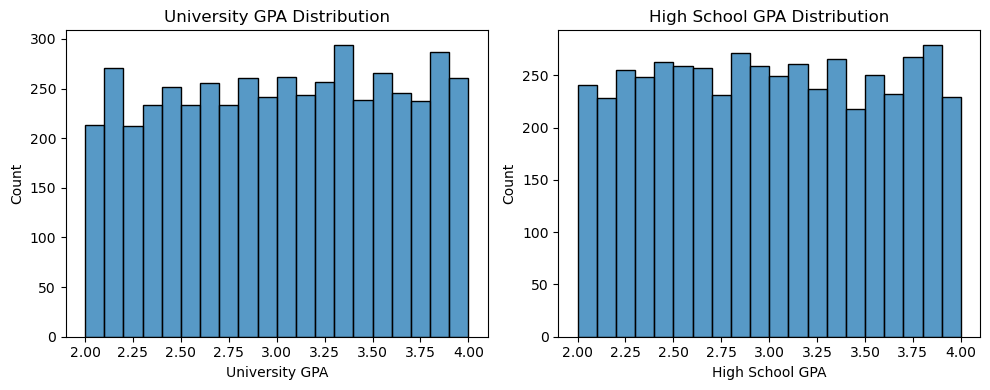

In [23]:
#Histograms

#wider, more spacious
plt.figure(figsize=(10,4))

#3. University_GPA
plt.subplot(1, 2, 1)
sns.histplot(data=df_da, x='University_GPA', bins=20)
plt.title('University GPA Distribution')
plt.xlabel('University GPA')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

#4. High_School_GPA
plt.subplot(1, 2, 2)
sns.histplot(data=df_da, x='High_School_GPA', bins=20)
plt.title('High School GPA Distribution')
plt.xlabel('High School GPA')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

plt.tight_layout()
plt.show()

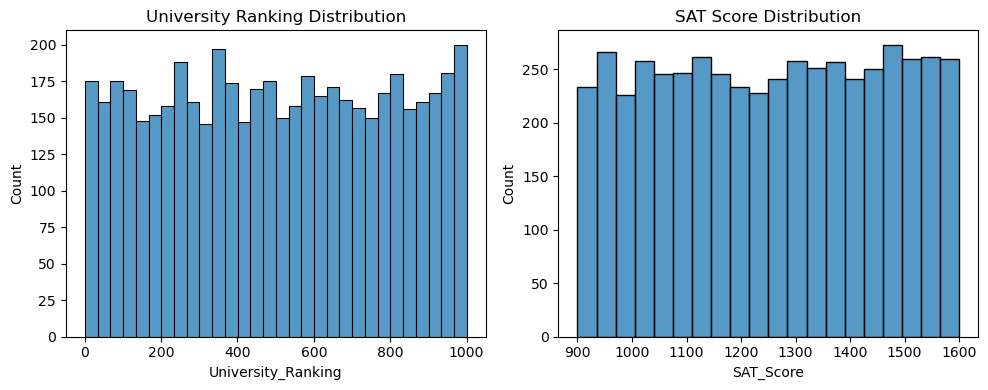

In [24]:
#Histograms

#wider, more spacious
plt.figure(figsize=(10,4))

#5. University_Ranking
plt.subplot(1, 2, 1)
sns.histplot(data=df_da, x='University_Ranking', bins=30)
plt.title('University Ranking Distribution')
plt.xlabel('University_Ranking')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

#6. SAT_Score
plt.subplot(1, 2, 2)
sns.histplot(data=df_da, x='SAT_Score', bins=20)
plt.title('SAT Score Distribution')
plt.xlabel('SAT_Score')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

plt.tight_layout()
plt.show()

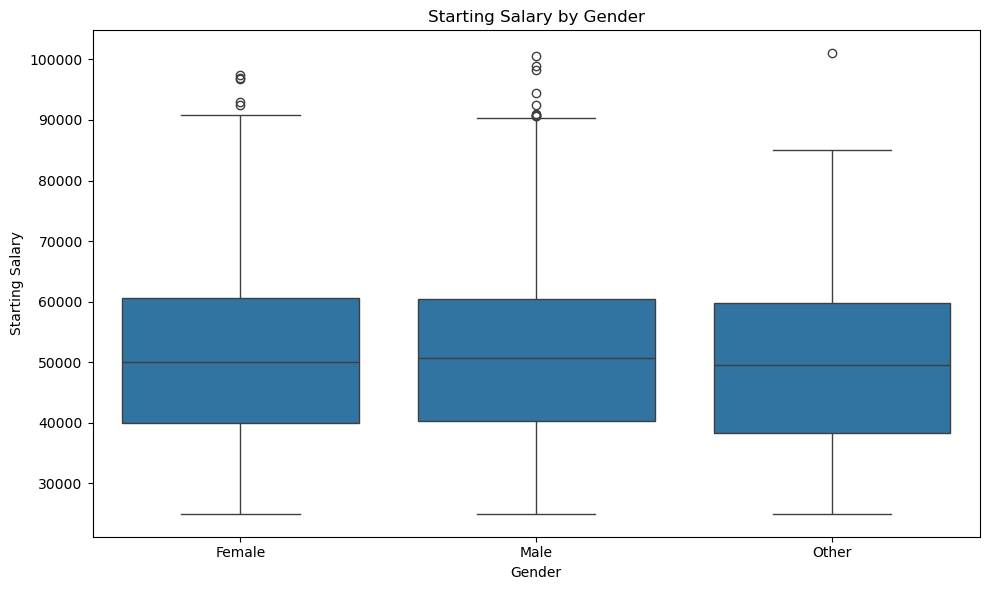

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Starting_Salary', data=df_da)
plt.title('Starting Salary by Gender')
plt.ylabel('Starting Salary')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

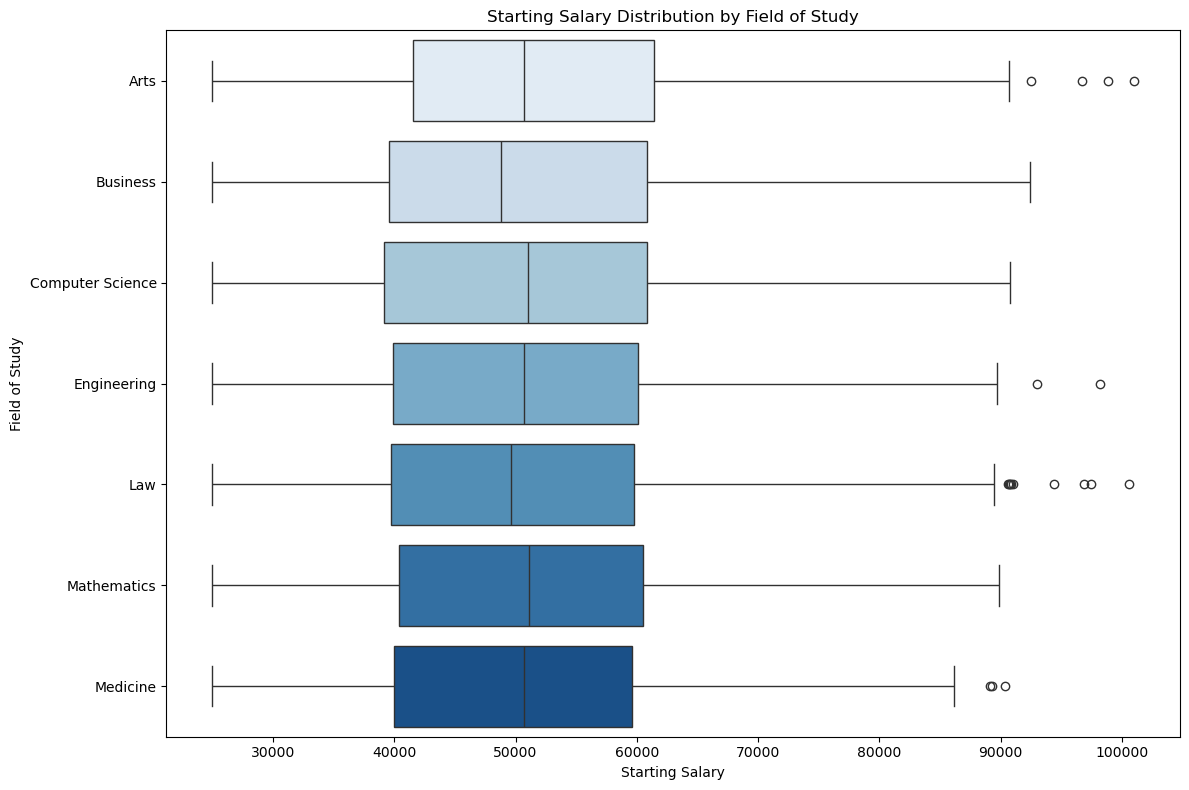

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='Field_of_Study', x='Starting_Salary', data=df_da, hue = 'Field_of_Study', legend = 'auto', palette = 'Blues')
plt.title('Starting Salary Distribution by Field of Study')
plt.xlabel('Starting Salary')
plt.ylabel('Field of Study')
plt.tight_layout()
plt.show()

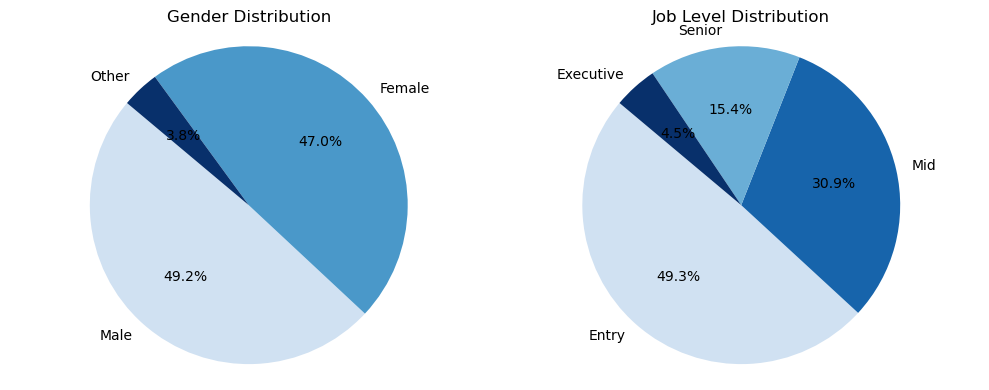

In [27]:
#Pie Charts

#wider, more spacious
plt.figure(figsize=(10,4))

#colors
gender_colors = plt.cm.Blues([0.2, 0.6, 1.0])
job_level_colors = plt.cm.Blues([0.2, 0.8, 0.5, 1.1])

#1. Gender
gender_counts = df_da['Gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels = gender_counts.index, colors = gender_colors,autopct = '%1.1f%%',startangle = 140)
plt.title('Gender Distribution')
plt.axis('equal')

#2. Current_Job_Level
job_level_counts = df_da['Current_Job_Level'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(job_level_counts, labels = job_level_counts.index, colors = job_level_colors, autopct = '%1.1f%%',startangle = 140)
plt.title('Job Level Distribution')
plt.axis('equal')

plt.tight_layout()
plt.show()

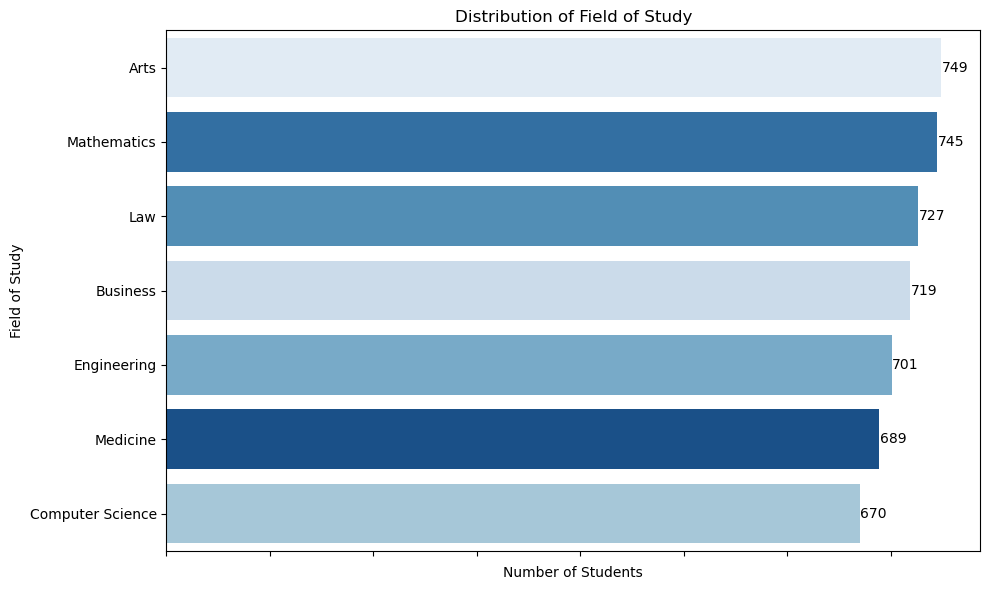

In [28]:
#Bar Plot

plt.figure(figsize=(10, 6))

# This defines 'ax' so we can later reference the bars
ax = sns.countplot(
    y='Field_of_Study',
    data=df_da,
    order=df_da['Field_of_Study'].value_counts().index,
    hue = 'Field_of_Study',
    palette = 'Blues',
    legend = 'auto'
)

plt.title('Distribution of Field of Study')
plt.xlabel('Number of Students')
plt.ylabel('Field of Study')

ax.set_xticklabels([])

# Add value labels
for bar in ax.patches:
    count = bar.get_width()
    ax.text(count + 0.5,                   # Horizontal position
            bar.get_y() + bar.get_height()/2,  # Vertical centering
            f'{int(count)}',               # Label text
            va='center')

plt.tight_layout()
plt.show()

Distribution Visualisations(Write-Up)

Relationship Visualisations(Code)

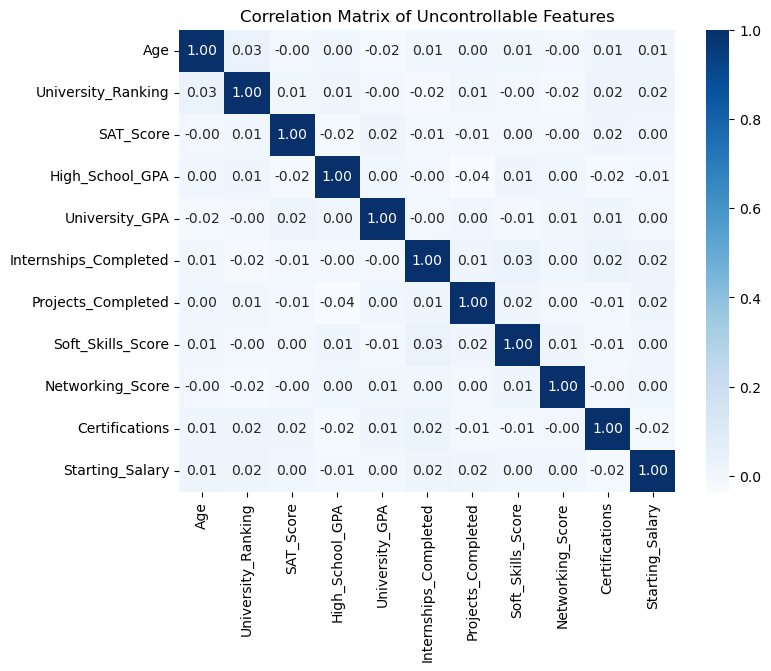

In [29]:
df_corr = df_da.copy()

corr_features = ['Age','University_Ranking','SAT_Score','High_School_GPA','University_GPA', 'Internships_Completed', 'Projects_Completed', 'Soft_Skills_Score', 'Networking_Score', 'Certifications' ,'Starting_Salary']
corr_matrix = df_corr[corr_features].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Matrix of Uncontrollable Features")
plt.show()

### DATA ANALYSIS AND VISUALISATIONS DICUSSION ##

1. Pie Chart – Gender:
The gender distribution was fairly balanced, with 49.2% male, 47% female, and 3.8% identifying as “other.” This suggests a nearly even gender representation in the dataset, which is often not the case in real-world samples for many fields.

2. Pie Chart – Job Level:
Nearly half (49.3%) of respondents were at the entry level, followed by 30.9% at mid-level, 15.4% senior, and 4.5% executive. This makes sense if the dataset is meant to represent early-career outcomes, but in real-life scenarios, there would likely be more variation and fewer people at the highest job levels.

3. Boxplots – Salary by Gender/Field of Study:
Boxplots showed that starting salaries were very similar across all genders and fields of study. The boxes (representing the middle 50% of salaries) overlapped almost completely, and all groups had a few outliers with very high salaries. In a real-world dataset, you might expect to see more pronounced differences or patterns.

4. Correlation Matrix – Features and Starting Salary:
The correlation scores between all features and starting salary were extremely low (ranging from -0.02 to 0.02). This means no single feature—such as GPA, SAT score, internships, or even university ranking, had a measurable relationship with starting salary in this data. 

5. Overall Interpretation:
These results reinforce the idea that this is sample or dummy data. While it provided a safe space to practice analysis, the lack of variation and real-world relationships limits the practical insights that can be drawn. 

### MACHINE LEARNING 1 ###

Simple machine learning models were built to predict starting salary and explore what factors might influence it most.

1. Before modeling, the data was split into training and test sets in a 80/20 ratio.
   
2. The categorical features were encoded.

4. Trained Linear regression and Polynomial Regression models (for salary prediction) and evaluated them using accuracy metrics and error scores.

In [30]:
#Data Preparation
# Define features and target
feature_list = ['Age', 'High_School_GPA', 'University_GPA', 'University_Ranking', 'SAT_Score',
                'Internships_Completed', 'Projects_Completed', 'Certifications',
                'Soft_Skills_Score', 'Networking_Score']
X = df_ml[feature_list]
y = df_ml['Starting_Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", root_mean_squared_error(y_test, y_pred_lr))

Linear Regression R²: -0.0013276796639676292
Linear Regression RMSE: 14599.097745401246


In [32]:
# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", root_mean_squared_error(y_test, y_pred_poly))

Polynomial Regression R²: -0.02023639249514808
Polynomial Regression RMSE: 14736.29514130501


### MACHINE LEARNING 1 DISCUSSION ###

Both the linear and polynomial regression models failed to predict starting salary with any accuracy. The R² values were negative, meaning our models performed worse than just guessing the average salary for everyone. The large RMSE values also show that the predicted salaries were far from the actual values. 

To further explore model performance, I removed features that had zero correlation with starting salary, leaving only those with at least a weak association.



### MACHINE LEARNING 2 ###

In [33]:
#Data Preparation
# Define features and target
feature_list2 = ['Age', 'High_School_GPA', 'University_Ranking','Internships_Completed', 'Projects_Completed', 'Certifications']
X2 = df_ml[feature_list2]
y2 = df_ml['Starting_Salary']

# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [34]:
# Linear Regression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train2, y_train2)

y_pred_lr2 = lin_reg2.predict(X_test2)

print("Linear Regression R² 2:", r2_score(y_test2, y_pred_lr2))
print("Linear Regression RMSE 2:", root_mean_squared_error(y_test2, y_pred_lr2))

Linear Regression R² 2: -0.0002965401535026668
Linear Regression RMSE 2: 14591.578935985786


In [35]:
# Polynomial features (degree 2)
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly.fit_transform(X_train2)
X_test_poly2 = poly.transform(X_test2)

lin_reg_poly2 = LinearRegression()
lin_reg_poly2.fit(X_train_poly2, y_train2)
y_pred_poly2 = lin_reg_poly2.predict(X_test_poly2)

print("Polynomial Regression R² 2:", r2_score(y_test2, y_pred_poly2))
print("Polynomial Regression RMSE 2:", root_mean_squared_error(y_test2, y_pred_poly2))

Polynomial Regression R² 2: -0.007170332163369375
Polynomial Regression RMSE 2: 14641.627974365672


In [36]:
# Evaluation Comparison
results = {
    'Model': ['Linear Regression 1', 'Polynomial Regression 1', 'Linear Regression 2', 'Polynomial Regression 2' ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test2, y_pred_lr2),
        r2_score(y_test2, y_pred_poly2),
    ],
    'RMSE': [
        root_mean_squared_error(y_test, y_pred_lr),
        root_mean_squared_error(y_test, y_pred_poly),
        root_mean_squared_error(y_test2, y_pred_lr2),
        root_mean_squared_error(y_test2, y_pred_poly2),
    ]
}

results_df = pd.DataFrame(results)

styled = (
    results_df.style
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '2px solid #1976d2'), ('background-color', '#e3f2fd'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1.5px solid #1976d2'), ('text-align', 'center')]}
    ])
    .set_properties(**{'font-size': '13pt'})
    .format(precision=6)
)
styled

,Model,R2 Score,RMSE
0,Linear Regression 1,-0.001328,14599.097745
1,Polynomial Regression 1,-0.020236,14736.295141
2,Linear Regression 2,-0.000297,14591.578936
3,Polynomial Regression 2,-0.007170,14641.627974


## CONCLUSION ##

1. Although the dataset used in this project appears to be dummy data, the analysis journey itself was valuable. It helped me to develop practical skills in data cleaning, visualization, interpretation, machine learning and highlighted the importance of understanding data quality.

2. For future projects, real-world datasets will be used to uncover meaningful trends and generate useful systems.

3. After retraining , I observed that the R2 and RMSE scores only improved marginally. This suggests that no combination of features in the current dataset can reliably predict starting salary. However, this process improved my understanding of feature selection and model optimization.

## RECOMMENDATIONS & NEXT STEPS ##

1. Students should focus on gaining practical experience through internships and projects to improve their career outcomes(starting salary). Studnets should also consider attending Universities with a good ranking score.


2. Collect real world data from a wider range of universities and job sectors to improve the analysis and build better prediction models that are fit for real-world use.

